## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [38]:
#importing the  necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [39]:
#loading the data
kc_data = pd.read_csv('data/kc_house_data.csv')
kc_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


DATA UNDERSTANDING;

Exploring  the dataset

In [40]:
# checking number of rows and columns
print('Number of rows:', kc_data.shape[0])
print('Number of columns:', kc_data.shape[1])

Number of rows: 21597
Number of columns: 21


In [41]:
#checking for column data types

print(kc_data.dtypes)


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [42]:
#checking missing values

print(kc_data.isnull().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [43]:
#checking Summary statistics
print(kc_data.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000   
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.539683    827.759761    

Identifying the target variable 

In [44]:
target = 'price'

Explore the different features in the dataset and identify the relevant features for the regression model

In [45]:

features = kc_data[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long']]
     
        
           
           
           
           
           
           


Handling the non numerical values 

In [46]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [47]:
kc_data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [48]:
#checking for rows and columnns in the dataset

print("Data frame rows and columns:", kc_data.shape)

Data frame rows and columns: (21597, 21)


The dataset has 21597 rows and 21 columns

In [49]:
#getting the summary statistics of the data

kc_data.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [50]:
#checking for missing values
print(kc_data.isnull().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


Waterfront,view and year renovated have missing values.View and waterfront are categorical columns so we'll replace the missing values with the mode and year renovated ,which is a numerical column, we'll replace the missing values with the median, not the mean, to avoid skewing the data.

In [51]:
#Checking for duplicates in the dataset
kc_data.duplicated().sum()

0

There are no duplicate values 

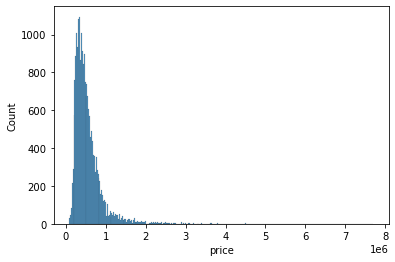

In [52]:
# Visualize the distribution of the target variable (price)
sns.histplot(kc_data['price'])
plt.show()


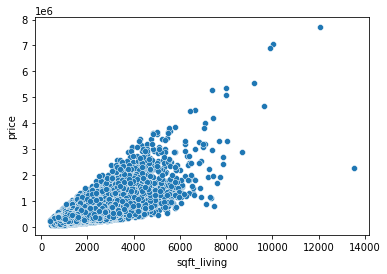

In [53]:
# Visualize the relationship between the target variable (price) and a predictor variable (sqft_living)
sns.scatterplot(x='sqft_living', y='price', data=kc_data)
plt.show()

DATA CLEANING

In [54]:
# Check for missing values in the data set
print(kc_data.isnull().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [55]:
# Drop rows with missing values
df = kc_data.dropna()

In [56]:
# Check for duplicate rows
print(kc_data.duplicated().sum())


0


There are no duplicate rows

In [57]:
# Check for outliers in the target variable (price)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(outliers)

# Remove outliers from the dataset
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

               id        date      price  bedrooms  bathrooms  sqft_living  \
5      7237550310   5/12/2014  1230000.0         4       4.50         5420   
21     2524049179   8/26/2014  2000000.0         3       2.75         3050   
49      822039084   3/11/2015  1350000.0         3       2.50         2753   
69     1802000060   6/12/2014  1330000.0         5       2.25         3200   
125    4389200955    3/2/2015  1450000.0         4       2.75         2750   
...           ...         ...        ...       ...        ...          ...   
21535  1561750040  12/24/2014  1380000.0         5       4.50         4350   
21552   524059330   1/30/2015  1700000.0         4       3.50         3830   
21560  9253900271    1/7/2015  3570000.0         5       4.50         4850   
21574  7430200100   5/14/2014  1220000.0         4       3.50         4910   
21584   249000205  10/15/2014  1540000.0         5       3.75         4470   

       sqft_lot  floors waterfront       view  ...         grad

In [58]:
# Remove outliers from the dataset
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

checking for and correct data entry errors

In [59]:
# Check for values in the bedrooms column that are outside of a reasonable range
print(df[df['bedrooms'] > 10].head())
print(df[df['bedrooms'] < 1].head())

# Correct values in the bedrooms column that are outside of a reasonable range
df.loc[df['bedrooms'] > 10, 'bedrooms'] = 10
df.loc[df['bedrooms'] < 1, 'bedrooms'] = 1

# Check for values in the sqft_living column that are inconsistent with the values in the bedrooms column
print(df[(df['sqft_living'] / df['bedrooms']) > 1000].head())

# Correct values in the sqft_living column that are inconsistent with the values in the bedrooms column
df.loc[(df['sqft_living'] / df['bedrooms']) > 1000, 'sqft_living'] = df['bedrooms'] * 1000

               id       date     price  bedrooms  bathrooms  sqft_living  \
8748   1773100755  8/21/2014  520000.0        11       3.00         3000   
15856  2402100895  6/25/2014  640000.0        33       1.75         1620   

       sqft_lot  floors waterfront  view  ...      grade sqft_above  \
8748       4960     2.0         NO  NONE  ...  7 Average       2400   
15856      6000     1.0         NO  NONE  ...  7 Average       1040   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
8748           600.0     1918        1999.0    98106  47.5560 -122.363   
15856          580.0     1947           0.0    98103  47.6878 -122.331   

       sqft_living15  sqft_lot15  
8748            1420        4960  
15856           1330        4700  

[2 rows x 21 columns]
Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft

cheking for and correcting data type errors

In [60]:
# Check the data types of each column
print(kc_data.dtypes)



id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


correcting all the data types of columns with errors

In [61]:
# Convert the date column to a date/time data type
kc_data['date'] = pd.to_datetime(kc_data['date'])

# Check the data types of each column again to confirm that the date column has been converted
print(kc_data.dtypes)

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront               object
view                     object
condition                object
grade                    object
sqft_above                int64
sqft_basement            object
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object


Tranforming the data

In [62]:
# Convert the date column to a date/time data type
kc_data['date'] = pd.to_datetime(kc_data['date'])

# Extract the year from the date column and create a new year column
kc_data['year'] = kc_data['date'].dt.year

# Extract the month from the date column and create a new month column
kc_data['month'] = kc_data['date'].dt.month

# Create a price_per_sqft column by dividing price by sqft_living
kc_data['price_per_sqft'] = kc_data['price'] / kc_data['sqft_living']

# Check the first few rows of the transformed dataset
print(kc_data.head())

           id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ... yr_built yr_renovated  zipcode  \
0      5650     1.0        NaN  NONE  ...     1955          0.0    98178   
1      7242     2.0         NO  NONE  ...     1951       1991.0    98125   
2     10000     1.0         NO  NONE  ...     1933          NaN    98028   
3      5000     1.0         NO  NONE  ...     1965          0.0    98136   
4      8080     1.0         NO  NONE  ...     1987          0.0    98074   

       lat     long  sqft_living15  sqft_lot15  year  month  price_per_sqft  
0  47.5112 -122.257           13

Normalizing the data

In [63]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the numeric columns of the dataset
scaler.fit(df.select_dtypes(include=['int64', 'float64']))

# Transform the numeric columns of the dataset
scaled_data = scaler.transform(df.select_dtypes(include=['int64', 'float64']))

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=df.select_dtypes(include=['int64', 'float64']).columns)

# Check the first few rows of the scaled dataset
print(scaled_df.head())

         id     price  bedrooms  bathrooms  sqft_living  sqft_lot   floors  \
0  0.625298  0.289517 -0.379964   0.271890     0.808138 -0.186071  0.97753   
1 -0.740069  0.606184  0.747693   1.331099    -0.007585 -0.241018 -0.88938   
2 -0.925322  0.155173 -0.379964  -0.081179    -0.382015 -0.165533 -0.88938   
3 -1.145413 -1.056318 -0.379964   0.271890    -0.335212 -0.196438  0.97753   
4 -0.765312 -1.190662 -0.379964  -1.493457    -0.248290 -0.180483 -0.88938   

   sqft_above  yr_built  yr_renovated   zipcode       lat      long  \
0    0.627937 -0.685060      5.095996  0.880702  1.169521 -0.746544   
1   -0.910382 -0.204075     -0.195741  1.087372 -0.249626 -1.266375   
2   -0.045078  0.551759     -0.195741 -0.077496  0.430884  1.178234   
3    0.002995  0.826607     -0.195741 -1.411457 -1.746039 -0.802742   
4   -0.910382 -0.375855     -0.195741  1.275254 -0.309879 -0.872989   

   sqft_living15  sqft_lot15  
0      -0.384691   -0.182541  
1      -0.922365   -0.280245  
2      -0.2

Univariate EDA

 It helps gain a better understanding of how individual variables in the dataset are distributed.

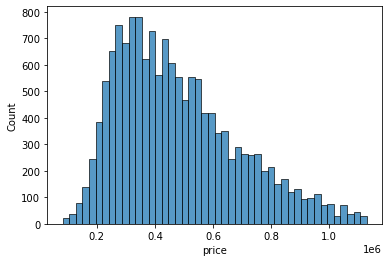

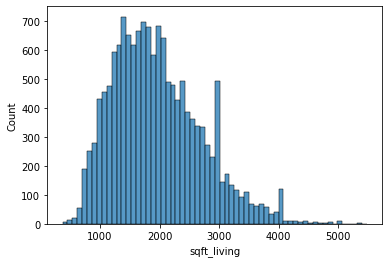

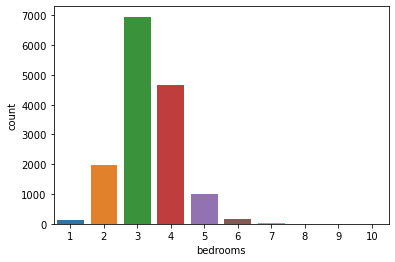

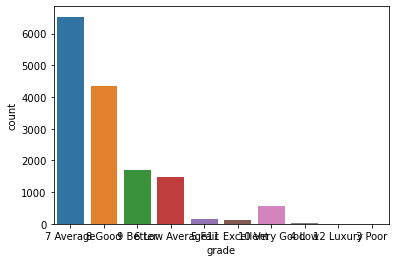

In [64]:
# Visualize the distribution of the target variable (price)
sns.histplot(df['price'])
plt.show()

# Visualize the distribution of a predictor variable (sqft_living)
sns.histplot(df['sqft_living'])
plt.show()

# Visualize the distribution of a predictor variable (bedrooms)
sns.countplot(x='bedrooms', data=df)
plt.show()

# Visualize the distribution of a predictor variable (grade)
sns.countplot(x='grade', data=df)
plt.show()

Bivariate EDA.

It helps to gain a better understanding of how pairs of variables in the dataset are related to each other.

Bivariate EDA

It helps to gain a better understanding of how pairs of variables in the dataset are related to each other.

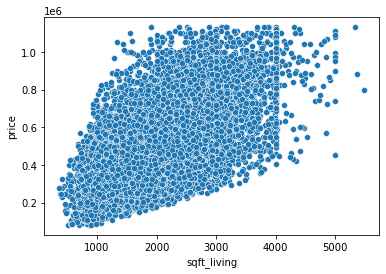

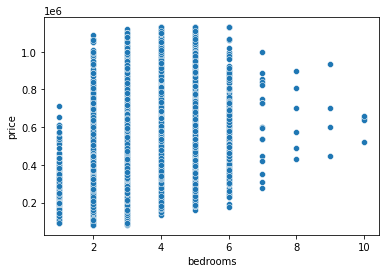

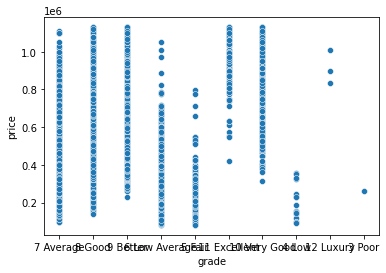

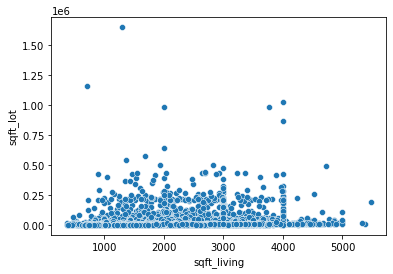

In [65]:
# Visualize the relationship between the target variable (price) and a predictor variable (sqft_living)
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.show()

# Visualize the relationship between the target variable (price) and a categorical predictor variable (bedrooms)
sns.scatterplot(x='bedrooms', y='price', data=df)
plt.show()

# Visualize the relationship between the target variable (price) and a predictor variable (grade)
sns.scatterplot(x='grade', y='price', data=df)
plt.show()

# Visualize the relationship between two predictor variables (sqft_living and sqft_lot)
sns.scatterplot(x='sqft_living', y='sqft_lot', data=df)
plt.show()

Multivariate EDA



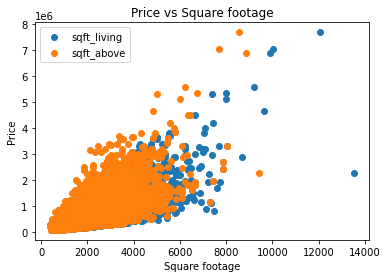

In [66]:
plt.scatter(kc_data['sqft_living'], kc_data['price'], label='sqft_living')
plt.scatter(kc_data['sqft_above'], kc_data['price'], label='sqft_above')
plt.xlabel('Square footage')
plt.ylabel('Price')
plt.title('Price vs Square footage')
plt.legend()
plt.show()

Multivarient EDA

The data points of sqft_living and sqft_above lie close together and they show a strong positive linear relationship with the price

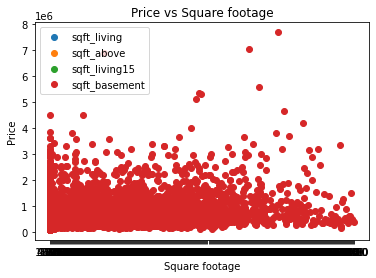

In [67]:
plt.scatter(kc_data['sqft_living'], kc_data['price'], label='sqft_living')
plt.scatter(kc_data['sqft_above'], kc_data['price'], label='sqft_above')
plt.scatter(kc_data['sqft_living15'], kc_data['price'], label='sqft_living15')
plt.scatter(kc_data['sqft_basement'], kc_data['price'], label='sqft_basement')
plt.xlabel('Square footage')
plt.ylabel('Price')
plt.title('Price vs Square footage')
plt.legend()
plt.show()